In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('E:\ex1data1 (1).txt',names =['Population','Profit'] )

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [9]:
data.tail(10)

,Population,Profit
87,6.0020,0.92695
88,5.5204,0.15200
89,5.0594,2.82140
90,5.7077,1.84510
91,7.6366,4.29590
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [10]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [11]:
data[['Population']]

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [12]:
data['Population']

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: Population, Length: 97, dtype: float64

In [13]:
data.index

RangeIndex(start=0, stop=97, step=1)

In [14]:
data.iloc[10:20,:]

,Population,Profit
10,5.7107,3.25220
11,14.1640,15.50500
12,5.7340,3.15510
13,8.4084,7.22580
14,5.6407,0.71618
15,5.3794,3.51290
16,6.3654,5.30480
17,5.1301,0.56077
18,6.4296,3.65180
19,7.0708,5.38930


In [15]:
data[data.Population> 13]

,Population,Profit
11,14.164,15.5050
21,20.270,21.7670
25,18.945,22.6380
28,13.176,14.6920
29,22.203,24.1470
62,21.279,17.9290
63,14.908,12.0540
64,18.959,17.0540
69,20.341,20.9920
95,13.394,9.0551


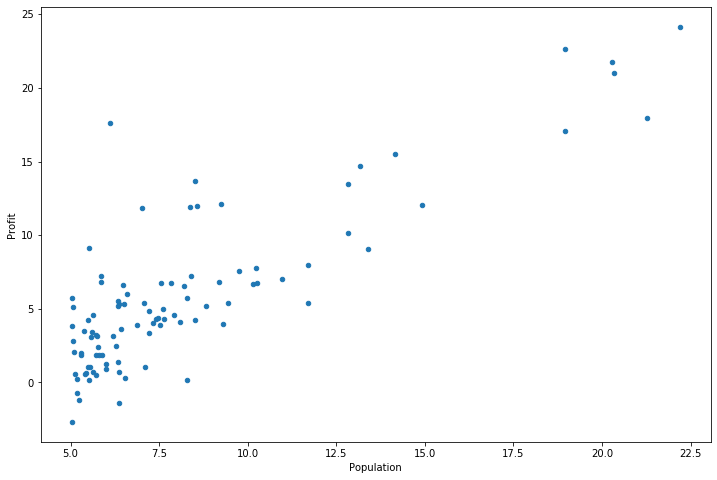

In [16]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (12,8))


In [17]:
data[['Population']]

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [18]:
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [19]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [20]:
def computeCost(X,y,theta):
    return np.sum(np.power(((X*theta.T)-y),2)) / (2*len(X))

In [21]:
data.insert(0,'One',1)

In [22]:
data

,One,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [23]:
X = data.iloc[:,0:2]
Y = data.iloc[:,2:3]

In [24]:
X

,One,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [25]:
Y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [26]:
X = np.matrix(X)
Y = np.matrix(Y)
theta = np.matrix(np.array([0,0]))

In [27]:
X.shape,theta.shape,Y.shape

((97, 2), (1, 2), (97, 1))

In [28]:
computeCost(X,Y ,theta)

32.072733877455676

In [29]:
def gradientDescent(X,y,theta,alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = 2
    cost = np.zeros(iters) 
    for i in range(iters):
        error = (X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error,X[:,j]) 
            temp[0,j] =theta[0,j] - ((alpha/len(X)) * np.sum(term)) 
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta, cost

In [43]:
final_theta, cost_matrix = gradientDescent(X,Y,theta,0.001,100000)

In [44]:
final_theta

matrix([[-3.89578082,  1.19303364]])

In [45]:
cost_matrix

array([27.94761975, 24.47289937, 21.54601437, ...,  4.47697138,
        4.47697138,  4.47697138])

In [47]:
cost_matrix[-1]

4.47697137597518

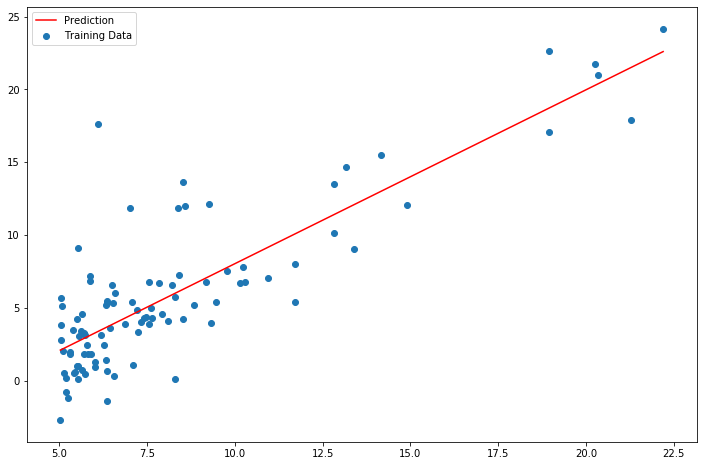

In [34]:
c = np.linspace(data.Population.min(), data.Population.max(), 100) 
f = final_theta[0,0] + (final_theta[0,1] *c) 
fig,ax = plt.subplots(figsize=(12,8)) 
ax.plot(c,f,'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data') 
ax.legend(loc=2)